In [4]:
classes = [
 'Analysis',
 'Backdoor',
 'Bot',
 'DDoS',
 'DoS',
 'DoS GoldenEye',
 'DoS Hulk',
 'DoS SlowHTTPTest',
 'DoS Slowloris',
 'Exploits',
 'FTP Patator',
 'Fuzzers',
 'Generic',
 'Heartbleed',
 'Infiltration',
 'Normal',
 'Port Scan',
 'Reconnaissance',
 'SSH Patator',
 'Shellcode',
 'Web Attack - Brute Force',
 'Web Attack - SQL Injection',
 'Web Attack - XSS',
 'Worms']


In [5]:
!pip install torch torchvision torchaudio

In [6]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("rdpahalavan/bert-network-packet-flow-header-payload")
model = AutoModelForSequenceClassification.from_pretrained("rdpahalavan/bert-network-packet-flow-header-payload")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/321 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/669k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/263M [00:00<?, ?B/s]

In [7]:
# Fine-tuning
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from torch.nn import CrossEntropyLoss
from torch.optim import Adam

In [ ]:
print(model)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
print(model.get_input_embeddings())

Embedding(28996, 768, padding_idx=0)


In [ ]:
print(model.config)

DistilBertConfig {
  "_name_or_path": "rdpahalavan/bert-network-packet-flow-header-payload",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "Analysis",
    "1": "Backdoor",
    "2": "Bot",
    "3": "DDoS",
    "4": "DoS",
    "5": "DoS GoldenEye",
    "6": "DoS Hulk",
    "7": "DoS SlowHTTPTest",
    "8": "DoS Slowloris",
    "9": "Exploits",
    "10": "FTP Patator",
    "11": "Fuzzers",
    "12": "Generic",
    "13": "Heartbleed",
    "14": "Infiltration",
    "15": "Normal",
    "16": "Port Scan",
    "17": "Reconnaissance",
    "18": "SSH Patator",
    "19": "Shellcode",
    "20": "Web Attack - Brute Force",
    "21": "Web Attack - SQL Injection",
    "22": "Web Attack - XSS",
    "23": "Worms"
  },
  "initializer_range": 0.02,
  "label2id": {
    "Analysis": 0,
    "Backdoor": 1,
    "Bot": 2,
    "DDoS": 3,
    "DoS": 4,
    "DoS G

In [ ]:
print(tokenizer)
print(tokenizer.model_input_names)

DistilBertTokenizerFast(name_or_path='rdpahalavan/bert-network-packet-flow-header-payload', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
['input_ids', 'attention_mask']


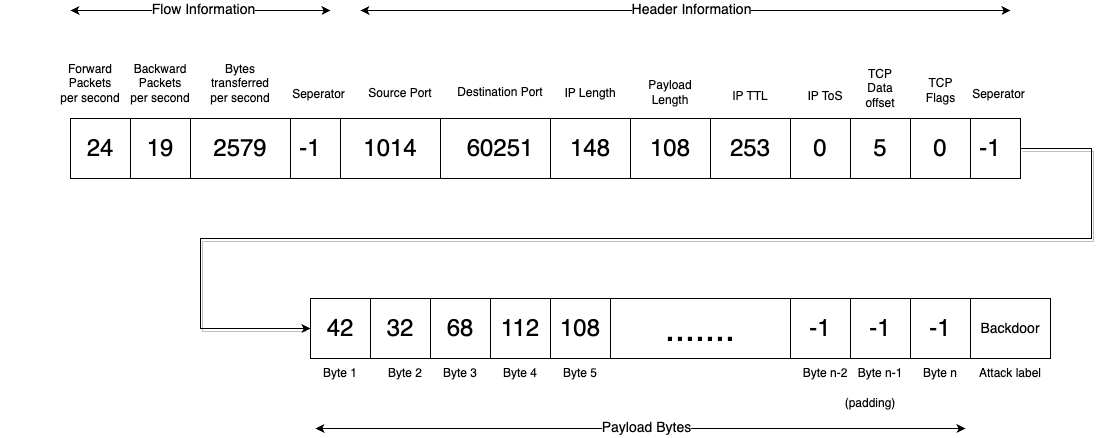

In [8]:
!pip install scapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444328 sha256=e660db33b29c31d7fb5400176c1e3d1740df014ed6c829beb9d3bdab4cd1876c
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy


In [9]:
from scapy.all import *

In [10]:
packets_brief = {}
forward_packets = {}
backward_packets = {}

def processing_packet_conversion(packet):

      final_data = ""

      src_ip = packet[IP].src
      dst_ip = packet[IP].dst

      src_port = packet.sport
      dst_port = packet.dport
      ip_length = len(packet[IP])
      #payload_length = len(packet.payload)
      ip_ttl = packet[IP].ttl
      ip_tos = packet[IP].tos
      tcp_data_offset = packet[TCP].dataofs
      tcp_flags = packet[TCP].flags

      if packet.time > 0:

            payload_bytes = bytes(packet.payload)
            payload_length = len(payload_bytes)

            if True :
            #if b"HTTP" in payload_bytes: # Optional HTTP filtering
              payload_content = payload_bytes.decode('utf-8', 'replace')
              payload_decimal = ' '.join(str(byte) for byte in payload_bytes)
              final_data = "0" + " " + "0" + " " + "195" + " " + "-1" + " " + str(src_port) + " " + str(dst_port) + " " + str(ip_length) + " " + str(payload_length) + " " + str(ip_ttl) + " " + str(ip_tos) + " " + str(tcp_data_offset) + " " + str(int(tcp_flags)) + " " + "-1" + " " + str(payload_decimal)
              return final_data



In [11]:
def predictingRowsCategory(file_path, filter):
  packets_nbr = 0
  with PcapReader(file_path) as pcap:
    for pkt in pcap :
      if IP in pkt : # IPv4
        if TCP in pkt:

          input_line = processing_packet_conversion(pkt)
          if input_line is not None:

            truncated_line = input_line[:1024]

            tokens = tokenizer(truncated_line, return_tensors="pt")
            outputs = model(**tokens)
            logits = outputs.logits
            probabilities = logits.softmax(dim=1)
            predicted_class = torch.argmax(probabilities, dim=1).item()

            predictedAttack = classes[predicted_class]

            if predictedAttack != "Normal":
              if predictedAttack not in packets_brief :
                packets_brief[predictedAttack] = 1
              else :
                packets_brief[predictedAttack] += 1

            print("Predicted class:", predicted_class)
            print("predicted class is : ", classes[predicted_class])
            print("Class probabilities:", probabilities.tolist())

          packets_nbr += 1

In [ ]:
predictingRowsCategory("/content/sample_data/hulk.pcap", b"HTTP")

import matplotlib.pyplot as plt

keys = list(packets_brief.keys())
vals = list(packets_brief.values())

plt.bar(keys, vals)

plt.xlabel('Attacks')
plt.ylabel('Values')
plt.title('Detected possible attacks')
plt.show()

NameError: name 'PcapReader' is not defined

**On spécifie à Pytorch que l'on souhaite prioriser l'entrainement sur GPU et non pas sur CPU :**

In [12]:
print(torch.cuda.get_device_name(0))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Tesla T4


In [13]:
def trainFromPcapFile(file_path, label, application_filter):

    training_set = []
    train_labels = []

    with PcapReader(file_path) as pcap:
        for pkt in pcap:
            if IP in pkt and TCP in pkt:  # IPv4 and TCP
                payload_bytes_to_filter = bytes(pkt.payload)
                if application_filter is None or application_filter in payload_bytes_to_filter:
                  input_line = processing_packet_conversion(pkt)
                  if input_line is not None:
                      truncated_line = input_line[:1024]
                      training_set.append(truncated_line)
                      train_labels.append(label)

    tokenized_input = tokenizer(training_set, padding=True, truncation=True, return_tensors="pt")
    tokenized_input['labels'] = torch.tensor(train_labels)

    # Move input tensors to the specified device
    tokenized_input = {key: value.to(device) for key, value in tokenized_input.items()}

    # Data loader
    dataset = TensorDataset(tokenized_input["input_ids"], tokenized_input["attention_mask"], tokenized_input["labels"])
    dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

    num_training_samples = len(dataloader.dataset)
    print(f"Number of training samples: {num_training_samples}")

    # Optimizer and loss function
    optimizer = Adam(model.parameters(), lr=1e-5)
    criterion = CrossEntropyLoss()

    # Training loop
    num_epochs = 3
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        total_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        for iteration, batch in enumerate(dataloader, 1):
            input_ids, attention_mask, labels = batch

            # Move batch tensors to the specified device
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            predictions = torch.argmax(outputs.logits, dim=1)
            correct_predictions += (predictions == labels).sum().item()
            total_samples += labels.size(0)
            print(f"Total samples: {total_samples}")

        model.save_pretrained("fine_tuned_model")

#trainFromPcapFile("/content/sample_data/nmap.pcap", 16) # Port scanning
#trainFromPcapFile("/content/sample_data/portscan.pcap", 16) # Port scanning
#trainFromPcapFile("/content/sample_data/hulk.pcap", 6) # Hulk
#trainFromPcapFile("/content/sample_data/dvwa_sql_injection.pcap.pcapng", 21, b"GET /")


In [14]:
def predictingRowsCategoryOnGPU(file_path, filter, debug):

  packets_brief.clear()

  packets_nbr = 0
  with PcapReader(file_path) as pcap:
    for pkt in pcap :
      if IP in pkt : # IPv4
        if TCP in pkt: #and b"HTTP" in bytes(pkt.payload):
           payload_bytes_to_filter = bytes(pkt.payload)
           if filter in payload_bytes_to_filter:
            input_line = processing_packet_conversion(pkt)
            if input_line is not None:
              truncated_line = input_line[:1024]

              tokens = tokenizer(truncated_line, return_tensors="pt")
              tokens = {key: value.to(device) for key, value in tokens.items()}
              outputs = model(**tokens)

              logits = outputs.logits
              probabilities = logits.softmax(dim=1)
              predicted_class = torch.argmax(probabilities, dim=1).item()

              predictedAttack = classes[predicted_class]

              if predictedAttack != "Normal":
                if predictedAttack not in packets_brief :
                  packets_brief[predictedAttack] = 1
                else :
                  packets_brief[predictedAttack] += 1

              if debug :
                print("Predicted class:", predicted_class)
                print("predicted class is : ", classes[predicted_class])
                print("Class probabilities:", probabilities.tolist())

            packets_nbr += 1

In [ ]:
predictingRowsCategoryOnGPU("/content/sample_data/nmap.pcap", b"", False)

keys = list(packets_brief.keys())
vals = list(packets_brief.values())

plt.bar(keys, vals, color='red', width=0.7)

plt.xlabel('Attacks', weight='bold')
plt.ylabel('Number of packets', weight='bold')
plt.title('Detected possible attacks')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/nmap.pcap'

Flask Backend

In [15]:
!pip install flask
!pip install flask_ngrok

In [23]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))

https://twtryxwcltj-496ff2e9c6d22116-5000-colab.googleusercontent.com/


In [27]:
import os
import matplotlib.pyplot as plt
from flask import Flask, render_template, request, redirect, url_for, send_file
from werkzeug.utils import secure_filename
app = Flask(__name__, template_folder='/content/sample_data/')
from io import BytesIO
import base64

index = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>PCAP File Processor</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f2f2f2;
            text-align: center;
            margin: 0;
            padding: 0;
        }

        h1 {
            color: #333;
        }

        form {
            margin-top: 20px;
        }

        input[type="file"] {
            padding: 10px;
            margin-bottom: 10px;
            border: 2px solid #ccc;
            border-radius: 5px;
            background-color: #fff;
            color: #333;
        }

        input[type="submit"] {
            padding: 10px 20px;
            background-color: #4CAF50;
            color: #fff;
            border: none;
            border-radius: 5px;
            cursor: pointer;
        }

        input[type="submit"]:hover {
            background-color: #45a049;
        }
    </style>
</head>
<body>
    <h1>Malicious PCAP File Analysis 🦈</h1>
    <form action="/upload" method="post" enctype="multipart/form-data">
        <input type="file" name="file" accept=".pcap">
        <br>
        <input type="text" name="filter" placeholder="Capture filter">
        <br><br>
        <input type="submit" value="Upload">
    </form>
</body>
</html>
"""


response = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>PCAP File Processor</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f2f2f2;
            text-align: center;
            margin: 0;
            padding: 0;
        }

        h1 {
            color: #333;
        }

        form {
            margin-top: 20px;
        }

        input[type="file"] {
            padding: 10px;
            margin-bottom: 10px;
            border: 2px solid #ccc;
            border-radius: 5px;
            background-color: #fff;
            color: #333;
        }

        input[type="submit"] {
            padding: 10px 20px;
            background-color: #4CAF50;
            color: #fff;
            border: none;
            border-radius: 5px;
            cursor: pointer;
        }

        input[type="submit"]:hover {
            background-color: #45a049;
        }

        .graph-container {
            margin-top: 20px;
        }
    </style>
</head>
<body>
    <h1>Malicious PCAP File Analysis 🦈</h1>
    <div class="graph-container">
        {% if graph1 %}
            <h2>Identified Known Attacks 🚨​</h2>
            <img src="data:image/png;base64,{{ graph1 }}" alt="Graph 1">
        {% endif %}
        {% if graph2 %}
            <h2>Graph 2</h2>
            <img src="data:image/png;base64,{{ graph2 }}" alt="Graph 2">
        {% endif %}
        <!-- Add more graph placeholders as needed -->
    </div>
</body>
</html>
"""

app.config['UPLOAD_FOLDER'] = '/content/sample_data'
app.config['ALLOWED_EXTENSIONS'] = {'pcap', 'pcapng'}

os.makedirs(app.config['UPLOAD_FOLDER'], exist_ok=True)

def generate_graph(data, title):
    plt.bar(data.keys(), data.values(), color='#ef6666', width=0.7)
    #plt.ylim(0, 50)
    plt.xlabel('Attacks', weight='bold')
    plt.ylabel('Number of packets', weight='bold')
    plt.title(title)

    img_bytes = BytesIO()
    plt.savefig(img_bytes, format='png')
    img_bytes.seek(0)

    # Convert the image to base64 encoding
    encoded_image = base64.b64encode(img_bytes.getvalue()).decode('utf-8')
    plt.close()

    return encoded_image

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in app.config['ALLOWED_EXTENSIONS']

@app.route("/")
def home():
    return index

@app.route('/upload', methods=['POST'])
def upload_file():

    packets_brief.clear()

    if 'file' not in request.files:
        return redirect(request.url)

    file = request.files['file']
    filter_value = request.form['filter']

    if file.filename == '':
        return redirect(request.url)

    if file and allowed_file(file.filename):
        filename = secure_filename(file.filename)
        file_path = os.path.join(app.config['UPLOAD_FOLDER'], filename)
        file.save(file_path)

        print("FILTER VALUE : ", filter_value)
        if len(filter_value) > 0 :
          predictingRowsCategoryOnGPU(file_path, filter_value.encode('utf-8'), True) # Will take care of saving data in packets_brief
        else:
          predictingRowsCategoryOnGPU(file_path, b"", True) # Will take care of saving data in packets_brief

        # Generate first graph
        keys1 = list(packets_brief.keys())
        vals1 = list(packets_brief.values())
        graph1 = generate_graph(dict(zip(keys1, vals1)), 'Detected possible attacks 1')

        return render_template_string(response, graph1=graph1)

        # keys = list(packets_brief.keys())
        # vals = list(packets_brief.values())

        # plt.bar(keys, vals, color='red', width=0.7)

        # plt.xlabel('Attacks', weight='bold')
        # plt.ylabel('Number of packets', weight='bold')
        # plt.title('Detected possible attacks')

        # img_bytes = BytesIO()
        # plt.savefig(img_bytes, format='png')
        # img_bytes.seek(0)

        # return send_file(img_bytes, mimetype='image/png')

if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [30/Jan/2024 11:32:08] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/Jan/2024 11:32:09] "GET /favicon.ico HTTP/1.1" 404 -


FILTER VALUE :  
Predicted class: 15
predicted class is :  Normal
Class probabilities: [[3.904707720353562e-12, 1.162850198077603e-11, 2.2049507109045408e-08, 1.4138727522094996e-07, 3.575786706733197e-07, 4.2794359167430684e-09, 1.0311457465661533e-08, 9.908662335078589e-09, 2.865994996881227e-09, 8.113343596960476e-08, 8.713766419532476e-08, 9.791102650869021e-11, 2.9455568650860187e-08, 1.0347073198246903e-09, 1.604234523000514e-09, 0.9999988079071045, 1.4038628037837952e-09, 1.3774450469128396e-09, 4.043720878144086e-07, 5.163397140406367e-11, 1.3237466678361898e-09, 1.091661969154778e-10, 3.018434169277384e-09, 1.4995715780230512e-10]]
Predicted class: 15
predicted class is :  Normal
Class probabilities: [[1.474408962975904e-11, 4.995715646716192e-11, 1.145428907278756e-08, 1.1560850907699205e-06, 4.709531538082956e-07, 6.72848088356659e-09, 2.2183287740062951e-07, 2.5064176512046288e-08, 1.1208238781534874e-08, 9.428931235788696e-08, 2.0069927586519043e-07, 3.2681832240477604e-10

INFO:werkzeug:127.0.0.1 - - [30/Jan/2024 11:32:26] "POST /upload HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/Jan/2024 11:32:27] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [30/Jan/2024 11:32:46] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/Jan/2024 11:32:47] "GET /favicon.ico HTTP/1.1" 404 -
